In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects

In [2]:
with open(r"Sheff Utd_Leeds.json") as f:
    md = json.load(f)

In [76]:
md

{'attendance': 25794,
 'away': {'averageAge': 26.2,
  'countryName': 'England',
  'field': 'away',
  'formations': [{'captainPlayerId': 44148,
    'endMinuteExpanded': 20,
    'formationId': 20,
    'formationName': '343d',
    'formationPositions': [{'horizontal': 5, 'vertical': 0},
     {'horizontal': 2.5, 'vertical': 5.5},
     {'horizontal': 7.5, 'vertical': 5.5},
     {'horizontal': 8, 'vertical': 2.5},
     {'horizontal': 5, 'vertical': 2.5},
     {'horizontal': 2, 'vertical': 2.5},
     {'horizontal': 5, 'vertical': 6.5},
     {'horizontal': 5, 'vertical': 4.5},
     {'horizontal': 5, 'vertical': 9},
     {'horizontal': 2, 'vertical': 9},
     {'horizontal': 7.5, 'vertical': 9}],
    'formationSlots': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0],
    'jerseyNumbers': [1,
     15,
     3,
     6,
     18,
     23,
     43,
     4,
     7,
     19,
     10,
     13,
     14,
     22,
     34,
     46,
     47,
     52],
    'period': 16,
    'playerIds': [300567,
     

In [4]:
df = json_normalize(md["events"], sep="_")

In [5]:
mask = df['playerId'] == 29571
df = df.loc[mask]

In [6]:
with open('Sheff Utd_Leeds.json') as json_file:
    data = json.load(json_file)

event = []
minute = []
second = []
player = []
team = []
outcome = []
x = []
y = []
endX = []
endY = []
goal = []
passtype = []


for each in data['events']:
    event.append(each['type']['displayName'])
    try:
        minute.append(each['minute'])
    except:
        minute.append('')
    try:
        second.append(each['second'])
    except:
        second.append('')
    try:
        player.append(each['playerId'])
    except:
        player.append('')
    try:
        team.append(each['teamId'])
    except:
        team.append('')
    try:
        endX.append(each['endX'])
        endY.append(each['endY'])
    except:
        endX.append('')
        endY.append('')
    outcome.append(each['outcomeType']['displayName'])
    x.append(each['x'])
    y.append(each['y'])

    for key, value in each.items():
        passType = 'OpenPlay'
        if key == 'qualifiers':
            for item in value:
                if item['type']['displayName'] == 'IntentionalGoalAssist':
                    passType = item['type']['displayName']
                elif item['type']['displayName'] == 'BigChanceCreated':
                    passType = item['type']['displayName']
                elif item['type']['displayName'] == 'Assisted':
                    passType = item['type']['displayName']
            passtype.append(passType)
                
events = pd.DataFrame({'Event':event, 'Minute':minute, 'Second':second, 'Player':player, 'Team':team, 'Outcome':outcome, 'x':x, 'y':y,
                      'endX':endX, 'endY':endY, 'passtype':passtype})

In [7]:
mask = events['Player'] == 29571
pablo = events.loc[mask]
pablo.Event.value_counts()

Pass               48
BallRecovery        8
BallTouch           3
TakeOn              2
BlockedPass         2
SavedShot           2
CornerAwarded       1
Clearance           1
Tackle              1
Interception        1
Goal                1
Foul                1
SubstitutionOff     1
Name: Event, dtype: int64

In [8]:
mask2 = (pablo['Event'] == 'Pass') & (pablo['Outcome'] == 'Successful') 
passed = pablo.loc[mask2]
passed.head()

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
37,Pass,1,12,29571,19,Successful,55.7,35.8,80.8,18.6,OpenPlay
91,Pass,4,2,29571,19,Successful,28.7,12.3,43.2,33.1,OpenPlay
112,Pass,4,52,29571,19,Successful,32.3,47.2,48,52.1,OpenPlay
117,Pass,5,7,29571,19,Successful,77.8,9.2,79.1,17,OpenPlay
213,Pass,10,40,29571,19,Successful,39.5,10.9,54.5,42.4,OpenPlay


In [9]:
mask2 = (pablo['Event'] == 'Pass') & (pablo['Outcome'] == 'Unsuccessful') 
unpassed = pablo.loc[mask2]
unpassed.head()

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
280,Pass,14,21,29571,19,Unsuccessful,73.2,12.2,74.9,16.1,OpenPlay
375,Pass,23,1,29571,19,Unsuccessful,29.5,27.3,29.2,38.9,OpenPlay
419,Pass,25,45,29571,19,Unsuccessful,99.5,99.5,100,26.1,OpenPlay
442,Pass,27,30,29571,19,Unsuccessful,64.8,7.6,74.1,10.7,OpenPlay
586,Pass,36,23,29571,19,Unsuccessful,73.6,43.5,73.9,50.1,OpenPlay


In [10]:
mask3 = (pablo['Event'] == 'MissedShots') | (pablo['Event'] == 'SavedShot')
shot = pablo.loc[mask3]
shot

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
530,SavedShot,33,18,29571,19,Successful,79.9,67.4,,,OpenPlay
1408,SavedShot,87,41,29571,19,Successful,75.6,49.9,,,OpenPlay


In [11]:
mask4 = pablo['Event'] == 'Goal'
goals = pablo.loc[mask4]
goals

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
1316,Goal,81,3,29571,19,Successful,90.9,47.3,,,Assisted


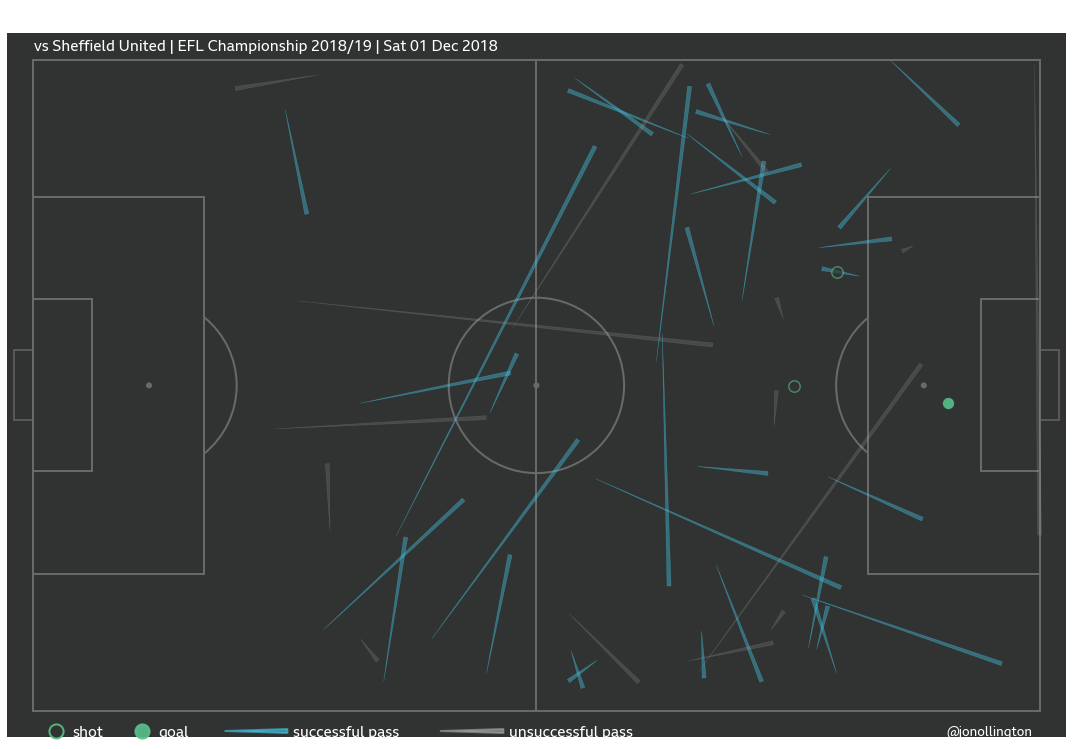

In [174]:
background = "#313332"
line = '#696969'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
goal = '#59c08a'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"

pitch = Pitch(figsize=(15,15),orientation='horizontal',view='full',goal_type='box',pitch_type='opta',
              pitch_color=background, line_color=line,constrained_layout=False)

fig, ax = pitch.draw()

style="wedge,tail_width=0.4"

#successful
xA = passed.x.values
yA = passed.y.values
xEA = passed.endX.values
yEA = passed.endY.values

for i in range(len(passed)):
    plt.annotate('', xy=(xA[i],yA[i]), xytext=(xEA[i],yEA[i]), zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#45c7e8', shrinkA=6, alpha=0.4))

#unsuccessful
xC = unpassed.x.values
yC = unpassed.y.values
xEC = unpassed.endX.values
yEC = unpassed.endY.values

for i in range(len(unpassed)):
    plt.annotate('', xy=(xC[i],yC[i]), xytext=(xEC[i],yEC[i]), zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='darkgrey', shrinkA=6, alpha=0.2))
    
#shots
xS = shot.x.values
yS = shot.y.values

plt.scatter(xS,yS,color=background, ec=goal, lw=1.5, s=130, zorder=11, alpha=0.6)

#goals
xG = goals.x.values
yG = goals.y.values
plt.scatter(xG,yG,color=goal, ec=background, lw=1, s=150, zorder=13, alpha=0.9)

fig.text(0.035, 0.83, "Pablo Hernández",fontsize=30, fontfamily=body_font, color=text_color, weight='bold',zorder=2)
fig.text(0.035, 0.81, "vs Sheffield United | EFL Championship 2018/19 | Sat 01 Dec 2018",fontsize=15, fontfamily=body_font, color=text_color,zorder=2)

ax4 = fig.add_axes([0.03,0.17,0.05,0.02])
ax4.axis("off")
ax4.scatter([0.03],[0.05],ec=goal, c=background, s=200, linewidth=2, zorder=12, alpha=0.9)
fig.text(0.07, 0.175, "shot",fontsize=15, fontfamily=body_font, color=text_color)

ax5 = fig.add_axes([0.11,0.17,0.05,0.02])
ax5.axis("off")
ax5.scatter([0.11],[0.05],c=goal, s=200, linewidth=2, zorder=12, alpha=0.9)
fig.text(0.15, 0.175, "goal",fontsize=15, fontfamily=body_font, color=text_color)

ax6 = fig.add_axes([0.2,0.17,0.05,0.02])
ax6.axis("off")
ax6.annotate('', [0.2,0.5],[1.5,0.5], zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=2,  color=assisted, shrinkA=6, alpha=0.6))

fig.text(0.275, 0.175, "successful pass",fontsize=15, fontfamily=body_font, color=text_color)

ax8 = fig.add_axes([0.39,0.17,0.05,0.02])
ax8.axis("off")
ax8.annotate('', [0.39,0.5],[1.7,0.5], zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=2,  color='darkgrey', shrinkA=6, alpha=0.6))

fig.text(0.475, 0.175, "unsuccessful pass",fontsize=15, fontfamily=body_font, color=text_color)

info_string = '@jonollington'
fig.text(0.88, 0.173, info_string, color='#ffffff', ha='left', va='bottom', fontsize=13, **csfont)

plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("pablo",bbox_inches="tight",dpi=300);

In [154]:
events.Event.value_counts()

Pass               931
BallRecovery       107
BallTouch           72
Aerial              68
Clearance           53
Foul                46
Tackle              30
Interception        25
CornerAwarded       24
TakeOn              23
BlockedPass         22
Dispossessed        21
MissedShots         12
Save                 9
SavedShot            9
Challenge            9
Card                 7
End                  6
KeeperPickup         6
SubstitutionOff      5
SubstitutionOn       5
Start                4
FormationChange      4
OffsideProvoked      3
Punch                3
OffsidePass          3
OffsideGiven         3
FormationSet         2
Error                2
Goal                 1
ShotOnPost           1
Name: Event, dtype: int64

In [138]:
mask = ((events['Team'] == 19) & (events['Event'] == 'Aerial')) | ((events['Team']==19) & (events['Event'] == 'Clearance')) | ((events['Team']==19) & (events['Event'] == 'Tackle')) | ((events['Team']==19) & (events['Event'] == 'Challenge')) | ((events['Team']==19) & (events['Event'] == 'Interception')) | ((events['Team']==19) & (events['Event'] == 'BlockedPass')) | ((events['Team']==19) & (events['Event'] == 'BallRecovery')) | ((events['Team']==19) & (events['Event'] == 'Foul'))
dallas = events.loc[mask]
dallas

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
10,Aerial,0,15,42637,19,Successful,46.2,88.4,,,OpenPlay
20,Aerial,0,40,44148,19,Unsuccessful,44.0,78.6,,,OpenPlay
23,BallRecovery,0,43,42637,19,Successful,28.8,96.0,,,OpenPlay
35,BallRecovery,1,9,134143,19,Successful,35.9,27.0,,,OpenPlay
43,Aerial,1,41,101634,19,Successful,72.2,80.0,,,OpenPlay
...,...,...,...,...,...,...,...,...,...,...,...
1486,Foul,92,40,101634,19,Unsuccessful,81.0,80.9,,,OpenPlay
1490,Aerial,93,4,270446,19,Unsuccessful,27.4,68.4,,,OpenPlay
1498,Clearance,93,11,121123,19,Successful,11.9,46.9,24.6,0,OpenPlay
1502,Clearance,93,27,134143,19,Successful,4.3,17.2,4.3,17.2,OpenPlay


In [63]:
mask = ((events['Team'] == 19) & (events['Event'] == 'Aerial')) | ((events['Team'] == 19) & (events['Event'] == 'BallRecovery')) | ((events['Team'] == 19) & (events['Event'] == 'Clearance')) | ((events['Team'] == 19) & (events['Event'] == 'Tackle')) | ((events['Team'] == 19) & (events['Event'] == 'Interception'))
def_actions = events.loc[mask]
def_actions

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
10,Aerial,0,15,42637,19,Successful,46.2,88.4,,,OpenPlay
20,Aerial,0,40,44148,19,Unsuccessful,44.0,78.6,,,OpenPlay
23,BallRecovery,0,43,42637,19,Successful,28.8,96.0,,,OpenPlay
35,BallRecovery,1,9,134143,19,Successful,35.9,27.0,,,OpenPlay
43,Aerial,1,41,101634,19,Successful,72.2,80.0,,,OpenPlay
...,...,...,...,...,...,...,...,...,...,...,...
1477,Clearance,91,41,134143,19,Successful,5.2,47.9,10.2,46.6,OpenPlay
1490,Aerial,93,4,270446,19,Unsuccessful,27.4,68.4,,,OpenPlay
1498,Clearance,93,11,121123,19,Successful,11.9,46.9,24.6,0,OpenPlay
1502,Clearance,93,27,134143,19,Successful,4.3,17.2,4.3,17.2,OpenPlay


In [64]:
mask5 = (events['Team'] == 19) & ((events['Event'] == 'Pass') & (events['Outcome'] == 'Successful'))
all_passes = events.loc[mask5]
all_passes

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
2,Pass,0,1,69638,19,Successful,50.0,50.0,44.6,53.3,OpenPlay
3,Pass,0,2,82972,19,Successful,44.6,53.3,42.5,81.7,OpenPlay
4,Pass,0,3,42637,19,Successful,42.6,82.3,30.6,55.7,OpenPlay
5,Pass,0,6,121123,19,Successful,30.6,55.7,28.3,72.1,OpenPlay
6,Pass,0,7,44148,19,Successful,28.3,72.1,8.5,54,OpenPlay
...,...,...,...,...,...,...,...,...,...,...,...
1444,Pass,89,52,363516,19,Successful,37.7,88.9,31.7,87.2,OpenPlay
1481,Pass,92,19,300567,19,Successful,12.3,40.7,60,97.8,OpenPlay
1482,Pass,92,22,42637,19,Successful,60.0,97.8,69.2,92.3,OpenPlay
1485,Pass,92,37,42637,19,Successful,65.3,100.0,81.5,82.1,OpenPlay


In [65]:
mask5 = (events['Team'] == 19) & ((events['Event'] == 'Pass') & (events['Outcome'] == 'Unsuccessful'))
all_unpass = events.loc[mask5]
all_unpass

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype
7,Pass,0,11,300567,19,Unsuccessful,9.3,59.3,58.2,66.1,OpenPlay
11,Pass,0,16,42637,19,Unsuccessful,46.2,85.1,48,84.7,OpenPlay
17,Pass,0,26,300567,19,Unsuccessful,10.1,48.8,84.2,98.1,OpenPlay
38,Pass,1,16,69638,19,Unsuccessful,82.3,17.9,90.5,100,OpenPlay
48,Pass,1,51,270446,19,Unsuccessful,41.3,43.4,63.8,41.9,OpenPlay
...,...,...,...,...,...,...,...,...,...,...,...
1435,Pass,89,39,202262,19,Unsuccessful,20.5,67.5,37.5,57,OpenPlay
1437,Pass,89,43,270446,19,Unsuccessful,21.9,68.1,38.6,67.8,OpenPlay
1445,Pass,89,53,42637,19,Unsuccessful,31.7,87.2,90.3,76.3,OpenPlay
1450,Pass,90,39,134143,19,Unsuccessful,17.9,0.0,40.2,16.9,OpenPlay


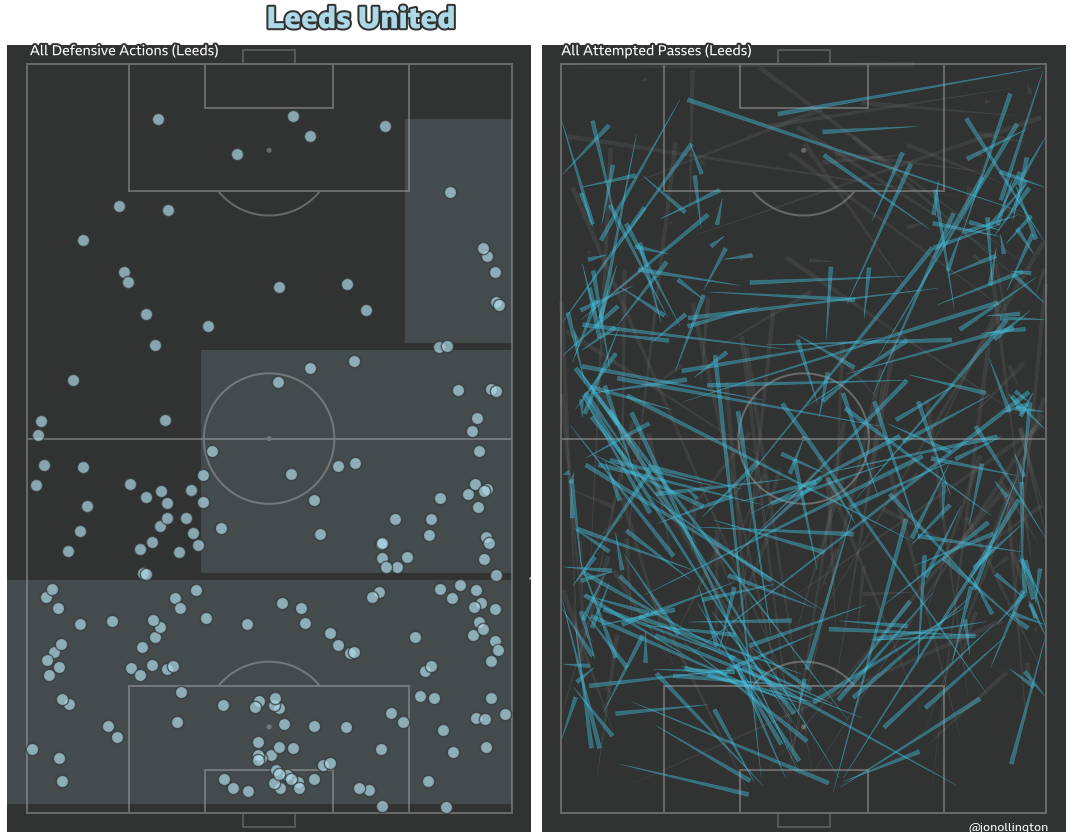

In [149]:
csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}
pitch = Pitch(figsize=(15,15),orientation='vertical',view='full',layout=(1, 2),goal_type='box',pitch_type='opta',
              pitch_color=background, line_color=line,constrained_layout=False)


fig, ax = pitch.draw()
ax[0].scatter(dallas['y'],dallas['x'],color='lightblue', s=150, zorder=12,alpha=0.7, ec=background,lw=1.5)

x = dallas['x']
ax[0].hist(x, bins = 3,rwidth=0.97, color='lightblue',alpha=0.15, orientation="horizontal")


# #aerial successful
# ax[1].scatter(aerial['y'],aerial['x'],color='lightblue', s=150, zorder=12,alpha=0.7, ec=background,lw=1.5)
# ax[1].scatter(unaerial['y'],unaerial['x'],color='darkgrey', s=150, zorder=12,alpha=0.7, ec=background,lw=1.5)

style="wedge,tail_width=0.4"

#successful
xP = all_passes.x.values
yP = all_passes.y.values
xEP = all_passes.endX.values
yEP = all_passes.endY.values

for i in range(len(all_passes)):
    ax[1].annotate('', xy=(yP[i],xP[i]), xytext=(yEP[i],xEP[i]), zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#45c7e8', shrinkA=6, alpha=0.4))

#unsuccessful
xC = all_unpass.x.values
yC = all_unpass.y.values
xEC = all_unpass.endX.values
yEC = all_unpass.endY.values

for i in range(len(all_unpass)):
    ax[1].annotate('', xy=(yC[i],xC[i]), xytext=(yEC[i],xEC[i]), zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='darkgrey', shrinkA=6, alpha=0.1))


fig.text(0.031, 0.88, "Sheffield United vs",fontsize=25, fontfamily=body_font, color=text_color, weight='bold',zorder=2, **csfont)
n = fig.text(0.25, 0.88, "Leeds United",fontsize=30, fontfamily=body_font, color='lightblue', weight='bold',zorder=2, **csfont)
n.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
fig.text(0.43, 0.88, " EFL Championship 2018/19 | Sat 01 Dec 2018",fontsize=18, fontfamily=body_font, color=text_color,zorder=2, **csfont)
n1 = fig.text(0.031, 0.855, "All Defensive Actions (Leeds)",fontsize=14, fontfamily=body_font, color='white',zorder=2, **csfont)
n1.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
n2 = fig.text(0.523, 0.855, "All Attempted Passes (Leeds)",fontsize=14, fontfamily=body_font, color='white',zorder=2, **csfont)
n2.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
info_string = '@jonollington'
fig.text(0.9, 0.135, info_string, color='#ffffff', ha='left', va='bottom', fontsize=12, **csfont)

#arrow
arrow="Simple,tail_width=0.4,head_width=1.3,head_length=0.9"
ax2 = fig.add_axes([0.48,0.17,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.7))

plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("leeds def actions",bbox_inches="tight",dpi=200);